In [2]:
#download dataset 
from google.colab import files
files.upload() # upload downloaded kaggle.json 
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset
# unzip data
!mkdir -p input
!unzip face-expression-recognition-dataset -d input/

Streaminguitvoer ingekort tot de laatste 5000 regels.
  inflating: input/images/validation/fear/8797.jpg  
  inflating: input/images/validation/fear/8818.jpg  
  inflating: input/images/validation/fear/886.jpg  
  inflating: input/images/validation/fear/9037.jpg  
  inflating: input/images/validation/fear/9040.jpg  
  inflating: input/images/validation/fear/9101.jpg  
  inflating: input/images/validation/fear/911.jpg  
  inflating: input/images/validation/fear/9179.jpg  
  inflating: input/images/validation/fear/9205.jpg  
  inflating: input/images/validation/fear/9232.jpg  
  inflating: input/images/validation/fear/9251.jpg  
  inflating: input/images/validation/fear/9261.jpg  
  inflating: input/images/validation/fear/9281.jpg  
  inflating: input/images/validation/fear/9302.jpg  
  inflating: input/images/validation/fear/9333.jpg  
  inflating: input/images/validation/fear/9369.jpg  
  inflating: input/images/validation/fear/9370.jpg  
  inflating: input/images/validation/fear/9474.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


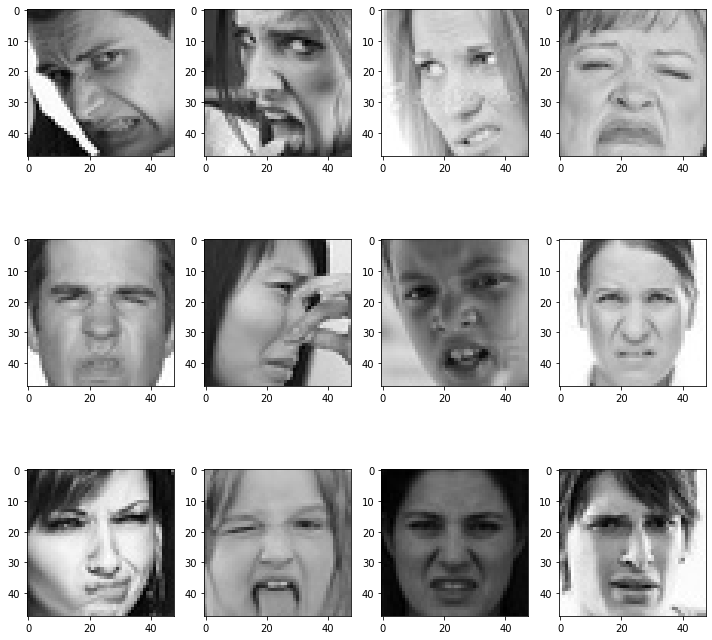

In [3]:
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "./input/images//"

plt.figure(0,figsize=(10,10))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,13):
        cpt = cpt + 1
        plt.subplot(3,4,i)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")


plt.tight_layout()
plt.show()


In [4]:
for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")

4982 neutral images
7164 happy images
4103 fear images
4938 sad images
3205 surprise images
3993 angry images
436 disgust images


In [5]:
train_data_dir = base_path +'train'
validation_data_dir = base_path + 'validation'

In [6]:
num_classes = 7
img_rows,img_cols = 48,48
batch_size = 32

In [7]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    shear_range=0.3,
                    zoom_range=0.3,
                    width_shift_range=0.4,
                    height_shift_range=0.4,
                    horizontal_flip=True,
                    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_data_dir,
                    color_mode='grayscale',
                    target_size=(img_rows,img_cols),
                    batch_size=batch_size,
                    class_mode='categorical',
                    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
                            validation_data_dir,
                            color_mode='grayscale',
                            target_size=(img_rows,img_cols),
                            batch_size=batch_size,
                            class_mode='categorical',
                            shuffle=True)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


Defining our Convolution and Dense layers model

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model = Sequential()

# Block-1

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-2 

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-3

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-4 

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-5

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-6

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-7

model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0

In [9]:
checkpoint = ModelCheckpoint('face_emotion.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

nb_train_samples = 24176
nb_validation_samples = 3006
epochs=25

history=model.fit(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)

Epoch 1/25
755/755 [==============================] - 640s 845ms/step - loss: 2.4706 - accuracy: 0.1731 - val_loss: 1.7970 - val_accuracy: 0.2597

Epoch 00001: val_loss improved from inf to 1.79703, saving model to face_emotion.h5
Epoch 2/25
755/755 [==============================] - 608s 805ms/step - loss: 1.8566 - accuracy: 0.2216 - val_loss: 1.7997 - val_accuracy: 0.2450

Epoch 00002: val_loss did not improve from 1.79703
Epoch 3/25
755/755 [==============================] - 598s 792ms/step - loss: 1.8045 - accuracy: 0.2481 - val_loss: 1.7953 - val_accuracy: 0.2507

Epoch 00003: val_loss improved from 1.79703 to 1.79528, saving model to face_emotion.h5
Epoch 4/25
755/755 [==============================] - 594s 786ms/step - loss: 1.7891 - accuracy: 0.2496 - val_loss: 1.6992 - val_accuracy: 0.3149

Epoch 00004: val_loss improved from 1.79528 to 1.69919, saving model to face_emotion.h5
Epoch 5/25
755/755 [==============================] - 632s 837ms/step - loss: 1.7670 - accuracy: 0.26

In [10]:
model.save_weights("face_emotion.h5")


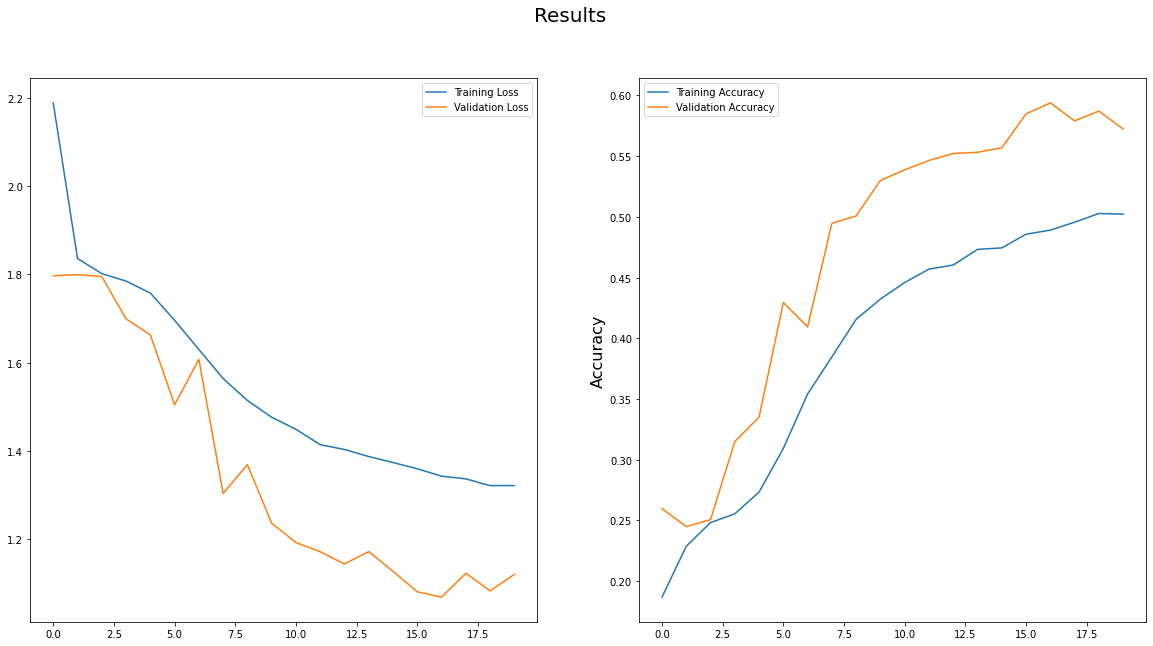

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle('Results',fontsize=20)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend(loc='upper right')
plt.subplot(1,2,2)
plt.ylabel("Accuracy",fontsize=16)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Validation Accuracy')
plt.legend()
plt.show()